In [1]:
#pip install yfinance

In [2]:
from Univariate import Univariate
import pandas as pd

In [3]:
obj= Univariate()

In [4]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = 'TATACOFFEE.BO' 

# Fetch historical data
tatacoffee_data = yf.download(ticker_symbol, start='2023-01-01', end='2024-01-01')

# Print the first few rows of the data
print(tatacoffee_data.head())


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2023-01-02  219.000000  219.000000  216.000000  217.550003  214.703110   37358
2023-01-03  229.300003  229.300003  218.000000  220.250000  217.367783   32832
2023-01-04  220.000000  220.850006  217.000000  217.250000  214.407043   20925
2023-01-05  217.550003  222.250000  217.500000  220.899994  218.009262   74212
2023-01-06  218.399994  221.899994  217.550003  218.300003  215.443298   11228


In [5]:
tatacoffee_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 230 entries, 2023-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       230 non-null    float64
 1   High       230 non-null    float64
 2   Low        230 non-null    float64
 3   Close      230 non-null    float64
 4   Adj Close  230 non-null    float64
 5   Volume     230 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 12.6 KB


In [6]:
dataset=tatacoffee_data

In [14]:
qual, quan = obj.Quanqual(dataset)

In [15]:
quan

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [16]:
qual

[]

In [17]:
des_data = obj.Univariate(dataset, quan)

In [18]:
des_data

,Open,High,Low,Close,Adj Close,Volume
mean,239.68,242.326304,237.45413,239.800869,238.738493,39975.769565
median,244.0,247.099998,241.424995,244.075005,244.075005,26816.0
mode,211.0,249.949997,245.800003,208.899994,206.166306,4809
Q1:25th,215.087502,215.987499,212.037498,213.875004,211.076202,17119.0
Q2:50th,244.0,247.099998,241.424995,244.075005,244.075005,26816.0
Q3:75th,258.750008,261.787491,255.762501,258.637497,258.637497,46519.0
99th,300.48399,304.221505,299.645012,302.911004,302.911004,248800.05
Q4:100th,312.25,322.700012,311.0,320.899994,320.899994,516229
IQR,43.662506,45.799992,43.725002,44.762493,47.561295,29400.0
min,199.949997,202.699997,199.149994,199.949997,197.33342,4809


In [19]:
des_data["Low"]

mean              237.45413
median           241.424995
mode             245.800003
Q1:25th          212.037498
Q2:50th          241.424995
Q3:75th          255.762501
99th             299.645012
Q4:100th              311.0
IQR               43.725002
min              199.149994
max                   311.0
lower whisker    146.449995
upper whisker    321.350004
skewness           0.357395
kurtosis          -0.795595
var              696.107722
std               26.383853
Name: Low, dtype: object

In [20]:
des_data['High']

mean             242.326304
median           247.099998
mode             249.949997
Q1:25th          215.987499
Q2:50th          247.099998
Q3:75th          261.787491
99th             304.221505
Q4:100th         322.700012
IQR               45.799992
min              202.699997
max              322.700012
lower whisker    147.287512
upper whisker    330.487478
skewness           0.337862
kurtosis          -0.786493
var              729.872503
std               27.016153
Name: High, dtype: object

In [21]:
import numpy as np

In [22]:
np.percentile(dataset["Low"],99)

299.6450122070313

In [23]:
np.percentile(dataset["High"],80)

265.5299987792969

In [24]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


Mean=237.454, Standard Deviation=26.384
The area between range(219,230):0.14527599615441636


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


0.14527599615441636

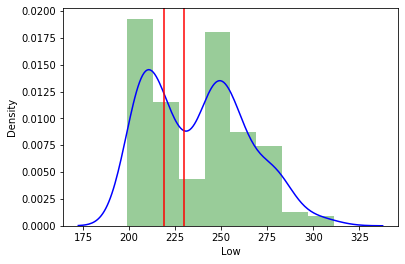

In [25]:
get_pdf_probability(dataset["Low"],219,230)

In [26]:
def stdNBgraph(dataset):
        # Coverted to standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)
    #z_score.std()

C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be 

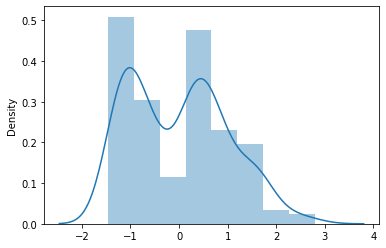

In [27]:
stdNBgraph(dataset["Low"])

In [28]:
def freqTable(columnName,dataset):
    import pandas as pd
    frq=pd.DataFrame()
    frq["Unique_Values"]=dataset[columnName].value_counts().index
    frq["Frequency"]=dataset[columnName].value_counts().values
    frq["Relative_Fre"]=dataset[columnName].value_counts().values/len(dataset[columnName])*100
    frq["Cumulative"]=frq["Relative_Fre"].cumsum()
    return frq

In [29]:
freqTable("Low",dataset)

,Unique_Values,Frequency,Relative_Fre,Cumulative
0,245.800003,3,1.304348,1.304348
1,255.850006,2,0.869565,2.173913
2,255.000000,2,0.869565,3.043478
3,208.699997,2,0.869565,3.913043
4,206.050003,2,0.869565,4.782609
...,...,...,...,...
204,225.250000,1,0.434783,98.260870
205,228.300003,1,0.434783,98.695652
206,226.750000,1,0.434783,99.130435
207,224.250000,1,0.434783,99.565217


In [30]:
fh=freqTable("High",dataset)

In [31]:
fh.sort_values(by="Frequency",ascending=False)

,Unique_Values,Frequency,Relative_Fre,Cumulative
0,249.949997,4,1.739130,1.739130
1,247.949997,3,1.304348,3.043478
10,212.250000,2,0.869565,10.869565
17,253.899994,2,0.869565,16.956522
16,249.000000,2,0.869565,16.086957
...,...,...,...,...
82,277.149994,1,0.434783,45.217391
83,277.549988,1,0.434783,45.652174
84,264.049988,1,0.434783,46.086957
85,278.950012,1,0.434783,46.521739


In [32]:
fhs=fh[fh["Frequency"]==2]["Unique_Values"].sort_values(ascending=False)

In [33]:
fhs

14    286.000000
9     279.450012
4     261.500000
17    253.899994
2     251.000000
13    249.199997
16    249.000000
11    247.500000
3     247.000000
15    227.500000
12    213.399994
10    212.250000
8     211.899994
7     210.000000
6     208.350006
5     204.149994
Name: Unique_Values, dtype: float64